# Mod 4 Project - Time Series Modeling
- Student name: Jose J. Villalobos
- Student pace: Part Time
- Scheduled project review date/time: Tuesday, June 16, 2020, 2:30 p.m.(PST)
- Instructor name: Abhineet Kulkarni/Jeff Herman
- Blog post URL: 

For this MOD 4 project I went ahead and chose the Time Series modeling, which gives us the task of finding the 5 best zipcodes to invest in for our stakeholders. I will be acting as a consultant to stakeholders that are interested in seeking some investment opportunities on the west coast. We will look at Los Angeles and two of its most popular areas; Downtown L.A.(DTLA) and Santa Monica(SAMO). 

Using the Return on Investment(ROI) statistic we will make a solid recommendation on whether or not L.A. is a place to find a sound investment. It will also give us some insight as to what could happen in the event of another financial crisis like we saw in 2008. 

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
# importing necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import itertools 
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
zips_data = pd.read_csv("zillow_data.csv")
zips_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
# Renaming the RegionName column to Zip_Codes
zips_data = zips_data.rename(columns={"RegionName":"Zip_Codes"})
zips_data.head()

,RegionID,Zip_Codes,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
# Dropping the RegionID column
zips_data.drop(columns="RegionID", inplace= True)
zips_data.head()

,Zip_Codes,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [5]:
# How many zip codes are we dealing with?
print("There are ", zips_data["Zip_Codes"].nunique(), "different Zip codes.")

There are  14723 different Zip codes.


That's a lot of zip codes, I will narrow down the zip codes to the ones I am interested in. This project will be focusing on the real estate market in Los Angeles, CA and will forecast the return of the investment five years into the future. This will help determine whether or not L.A. is an opportunity for a sound investment. Let's take a look at what L.A. home values are looking like.

In [6]:
# Filtering out LA county zip codes
zips_2 = zips_data.copy()
LA_zips = zips_2.loc[zips_data["CountyName"] == "Los Angeles"]
display(LA_zips.head())

LA_zips.tail()

,Zip_Codes,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
15,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,16,152500.0,152600.0,152600.0,152600.0,...,579300,585700,590900,594700,598500,601300,602800,606100,612400,616200
30,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,31,340600.0,341700.0,343000.0,344400.0,...,1839800,1861100,1888600,1903900,1907500,1922100,1952400,1974500,1975900,1966900
75,90034,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,76,231300.0,231700.0,232100.0,232400.0,...,1287500,1310000,1329900,1347200,1360300,1368500,1382700,1398000,1411400,1419100
86,90044,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,87,119500.0,119500.0,119400.0,119300.0,...,383800,386900,390600,394300,398600,404200,409700,414300,418500,421100
90,90805,Long Beach,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,91,128300.0,128100.0,127800.0,127500.0,...,426900,430600,434800,439300,443500,447700,451700,455000,457600,459100


,Zip_Codes,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
9681,90290,Topanga,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,9682,337800.0,338800.0,339900.0,340900.0,...,1159100,1178200,1200400,1224500,1242900,1240000,1217900,1211200,1218900,1220200
12009,90704,Avalon,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,12010,276300.0,275100.0,273800.0,272500.0,...,638700,643200,651800,659800,661900,660200,659200,665200,688500,714300
12857,93532,Lake Hughes,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,12858,116400.0,116400.0,116300.0,116300.0,...,252500,255400,258100,259900,261600,264000,266400,270500,276600,280800
13699,93553,Pearblossom,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,13700,NaN,NaN,NaN,NaN,...,201400,202400,204800,209200,214000,216700,218600,224100,230000,233700
14672,91008,Bradbury,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,14673,351200.0,351200.0,351300.0,351300.0,...,1231800,1248800,1269200,1273600,1269300,1275200,1280100,1283000,1314900,1359900


From this quick peek at the data we can see that the zip code has a lot to do with the value of your home in L.A. Being born and raised in Los Angeles I can relate, and there has always been a big difference of the value of a home in Beverly Hills to a home in South Central L.A.   

In [7]:
# How many different cities in LA county
print("There are ", LA_zips["City"].nunique(), "different cities in LA County.")

There are  95 different cities in LA County.


In [8]:
print("There are", LA_zips["Zip_Codes"].nunique(), "zip codes in LA County.")

There are 264 zip codes in LA County.


Los Angeles is a very big, sprawling city, made up of a bunch of little cities within its city borders. People tend to look to the Downtown area and areas by the beach to live because of the "LA life" appeal. We have always been known for our great weather year round, palm trees, diversity, Hollywood of course, and all the stuff we have seen on movies and TV.

Now we are going to take a look at two of the most popular neighborhoods in the city, the Downtown area and Santa Monica to gain some insight on the difference of investing by the ocean or by the city's center. I will later use this data to build my model to forecast the return within five years. 

In [9]:
SAMO_data = LA_zips.loc[LA_zips["City"] == "Santa Monica"]
SAMO_data.head()

,Zip_Codes,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1915,90405,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1916,308700.0,309600.0,310500.0,311400.0,...,1937500,1959900,1984300,1994600,1982300,1966600,1969100,1974200,1980100,1984900
2070,90403,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2071,461900.0,464300.0,466700.0,469300.0,...,2738300,2737900,2742300,2754000,2765600,2787100,2813400,2837000,2857500,2864200
4036,90404,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4037,237400.0,238300.0,239300.0,240300.0,...,1426500,1443800,1449400,1448800,1458400,1467700,1475200,1490300,1515400,1529300
7380,90402,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,7381,880000.0,881400.0,882700.0,883800.0,...,3958400,3982900,4020700,4053200,4068200,4089200,4125000,4152300,4169700,4179000


After realizing that DTLA is not actually a city in Los Angeles I took to Google and looked up the nine different zip codes
that are within the DTLA area. 

In [10]:
# Filtering for DTLA zip codes
DTLA_zips = [90012, 90013, 90014, 90015, 90017, 90021, 90071, 90074, 90079]
DTLA_data = LA_zips.loc[LA_zips["Zip_Codes"].isin(DTLA_zips)]

In [11]:
# option set to see all columns
pd.set_option("display.max_columns", None)

In [12]:
DTLA_data

,Zip_Codes,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2642,90012,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2643,121000.0,121000.0,120900.0,120800.0,120700.0,120600.0,120700.0,120800.0,121100.0,121600.0,121900.0,122200.0,122500.0,122800.0,123100.0,123500.0,123900.0,124300.0,124900.0,125500.0,126200.0,127100.0,128000.0,128600.0,129300.0,129900.0,130500.0,131100.0,131700.0,132300.0,133000.0,133700.0,134600.0,135600.0,136500.0,137300.0,138000.0,138800.0,139500.0,140300.0,141100.0,142000.0,142900.0,143900.0,145100.0,146400.0,147600.0,148700.0,149800.0,150800.0,151700.0,152700.0,153700.0,154800.0,156000.0,157300.0,158700.0,160300.0,162000.0,163500.0,165100.0,166600.0,168200.0,169800.0,171600.0,173500.0,175600.0,177900.0,180400.0,183000.0,185700.0,188200.0,190700.0,193100.0,195500.0,197800.0,200100.0,202500.0,205200.0,208100.0,211000.0,213600.0,216300.0,219600.0,223300.0,227600.0,232500.0,237500.0,242300.0,247100.0,252800.0,259800.0,268200.0,277400.0,286700.0,295800.0,304800.0,313800.0,323400.0,333600.0,344200.0,354800.0,364500.0,372600.0,379700.0,386400.0,393500.0,401200.0,409300.0,417000.0,424300.0,431300.0,438100.0,444900.0,451500.0,457200.0,462000.0,466300.0,470700.0,476000.0,482200.0,488900.0,495700.0,501900.0,505900.0,507800.0,508200.0,507900.0,507700.0,507900.0,507900.0,507700.0,507200.0,506000.0,504200.0,501500.0,497400.0,492100.0,485900.0,478500.0,469900.0,461200.0,452400.0,443100.0,432700.0,421700.0,410400.0,400500.0,392000.0,384400.0,377400.0,370600.0,363800.0,357900.0,352300.0,346400.0,339800.0,332600.0,325800.0,321000.0,317700.0,315500.0,314700.0,314300.0,313900.0,314200.0,315300.0,313800.0,311700.0,311600.0,311800.0,309800.0,308700.0,309800.0,311800.0,313600.0,315000.0,315100.0,312800.0,311200.0,311000.0,309600.0,307000.0,305900.0,306400.0,304500.0,301400.0,299000.0,298300.0,297300.0,295500.0,294400.0,294300.0,294400.0,295200.0,296

Out of the nine zip codes in the DTLA area there is only data for the first five codes on the list. The other four zip codes are within the Fashion District and the Historic Core of Downtown L.A. These must be areas where there is no type of residential buildings, just warehouses, factories, official buildings, and historic landmarks. 

For the 90013 and 90014 zip codes, the data begins in September of 2013. This might become a problem in modeling later. 

Looking at this data we can clearly see a difference in home values, living by the beach has its price. On the other hand, the initial investment in Downtown L.A. will be significantly lower than in Santa Monica.

In [13]:
DTLA_data.shape

(5, 271)

In [14]:
SAMO_data.shape

(4, 271)

In [15]:
# Putting both areas in one dataframe for some plotting 
DT_SM_data = pd.concat([DTLA_data, SAMO_data]) 

In [16]:
DT_SM_data.shape

(9, 271)

In [17]:
# Verifying the dataframe is correct
DT_SM_data.loc[DT_SM_data["Zip_Codes"] == 90012]

,Zip_Codes,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2642,90012,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2643,121000.0,121000.0,120900.0,120800.0,120700.0,120600.0,120700.0,120800.0,121100.0,121600.0,121900.0,122200.0,122500.0,122800.0,123100.0,123500.0,123900.0,124300.0,124900.0,125500.0,126200.0,127100.0,128000.0,128600.0,129300.0,129900.0,130500.0,131100.0,131700.0,132300.0,133000.0,133700.0,134600.0,135600.0,136500.0,137300.0,138000.0,138800.0,139500.0,140300.0,141100.0,142000.0,142900.0,143900.0,145100.0,146400.0,147600.0,148700.0,149800.0,150800.0,151700.0,152700.0,153700.0,154800.0,156000.0,157300.0,158700.0,160300.0,162000.0,163500.0,165100.0,166600.0,168200.0,169800.0,171600.0,173500.0,175600.0,177900.0,180400.0,183000.0,185700.0,188200.0,190700.0,193100.0,195500.0,197800.0,200100.0,202500.0,205200.0,208100.0,211000.0,213600.0,216300.0,219600.0,223300.0,227600.0,232500.0,237500.0,242300.0,247100.0,252800.0,259800.0,268200.0,277400.0,286700.0,295800.0,304800.0,313800.0,323400.0,333600.0,344200.0,354800.0,364500.0,372600.0,379700.0,386400.0,393500.0,401200.0,409300.0,417000.0,424300.0,431300.0,438100.0,444900.0,451500.0,457200.0,462000.0,466300.0,470700.0,476000.0,482200.0,488900.0,495700.0,501900.0,505900.0,507800.0,508200.0,507900.0,507700.0,507900.0,507900.0,507700.0,507200.0,506000.0,504200.0,501500.0,497400.0,492100.0,485900.0,478500.0,469900.0,461200.0,452400.0,443100.0,432700.0,421700.0,410400.0,400500.0,392000.0,384400.0,377400.0,370600.0,363800.0,357900.0,352300.0,346400.0,339800.0,332600.0,325800.0,321000.0,317700.0,315500.0,314700.0,314300.0,313900.0,314200.0,315300.0,313800.0,311700.0,311600.0,311800.0,309800.0,308700.0,309800.0,311800.0,313600.0,315000.0,315100.0,312800.0,311200.0,311000.0,309600.0,307000.0,305900.0,306400.0,304500.0,301400.0,299000.0,298300.0,297300.0,295500.0,294400.0,294300.0,294400.0,295200.0,296

In [18]:
# Verifying the dataframe is correct
DTLA_data.loc[DTLA_data["Zip_Codes"] == 90012]

,Zip_Codes,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2642,90012,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2643,121000.0,121000.0,120900.0,120800.0,120700.0,120600.0,120700.0,120800.0,121100.0,121600.0,121900.0,122200.0,122500.0,122800.0,123100.0,123500.0,123900.0,124300.0,124900.0,125500.0,126200.0,127100.0,128000.0,128600.0,129300.0,129900.0,130500.0,131100.0,131700.0,132300.0,133000.0,133700.0,134600.0,135600.0,136500.0,137300.0,138000.0,138800.0,139500.0,140300.0,141100.0,142000.0,142900.0,143900.0,145100.0,146400.0,147600.0,148700.0,149800.0,150800.0,151700.0,152700.0,153700.0,154800.0,156000.0,157300.0,158700.0,160300.0,162000.0,163500.0,165100.0,166600.0,168200.0,169800.0,171600.0,173500.0,175600.0,177900.0,180400.0,183000.0,185700.0,188200.0,190700.0,193100.0,195500.0,197800.0,200100.0,202500.0,205200.0,208100.0,211000.0,213600.0,216300.0,219600.0,223300.0,227600.0,232500.0,237500.0,242300.0,247100.0,252800.0,259800.0,268200.0,277400.0,286700.0,295800.0,304800.0,313800.0,323400.0,333600.0,344200.0,354800.0,364500.0,372600.0,379700.0,386400.0,393500.0,401200.0,409300.0,417000.0,424300.0,431300.0,438100.0,444900.0,451500.0,457200.0,462000.0,466300.0,470700.0,476000.0,482200.0,488900.0,495700.0,501900.0,505900.0,507800.0,508200.0,507900.0,507700.0,507900.0,507900.0,507700.0,507200.0,506000.0,504200.0,501500.0,497400.0,492100.0,485900.0,478500.0,469900.0,461200.0,452400.0,443100.0,432700.0,421700.0,410400.0,400500.0,392000.0,384400.0,377400.0,370600.0,363800.0,357900.0,352300.0,346400.0,339800.0,332600.0,325800.0,321000.0,317700.0,315500.0,314700.0,314300.0,313900.0,314200.0,315300.0,313800.0,311700.0,311600.0,311800.0,309800.0,308700.0,309800.0,311800.0,313600.0,315000.0,315100.0,312800.0,311200.0,311000.0,309600.0,307000.0,305900.0,306400.0,304500.0,301400.0,299000.0,298300.0,297300.0,295500.0,294400.0,294300.0,294400.0,295200.0,296

In [19]:
# verifying zip codes
DT_SM_data.Zip_Codes.unique()

array([90012, 90017, 90015, 90013, 90014, 90405, 90403, 90404, 90402],
      dtype=int64)

# Step 2: Data Preprocessing

The helper function below will take the data frame and reshape it from wide to long format, placing the time as the index and the values in the column. 

In [20]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['Zip_Codes', 'City', 'State', 'Metro',
                                  'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})    

In [21]:
# def get_datetimes(df):
#     return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [22]:
DTLA_melt = melt_data(DTLA_data)
DTLA_melt.head()

,value
time,
1996-04-01,140166.666667
1996-05-01,140500.000000
1996-06-01,140833.333333
1996-07-01,141133.333333
1996-08-01,141466.666667


In [23]:
SAMO_melt = melt_data(SAMO_data)
SAMO_melt.head()

,value
time,
1996-04-01,472000.0
1996-05-01,473400.0
1996-06-01,474800.0
1996-07-01,476200.0
1996-08-01,477700.0


# Step 3: EDA and Visualization

In [24]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

# matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

Here we will take a look at the average home values in our chosen areas. This will give us an estimate as to how much our stakeholders' initial investment might be. With that in mind we will also look at the Return on Investment(ROI) for a two and five year period, this information will give us an idea how much might be gained or lost. 

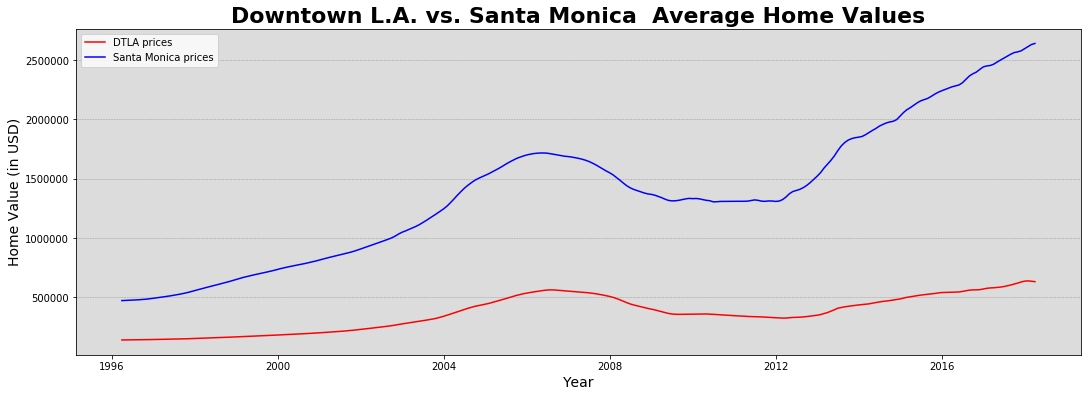

In [25]:
# Average Home values in Downtown L.A. and Santa Monica
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 1, 1, facecolor = "Gainsboro")
ax.plot(DTLA_melt, label = "DTLA prices", color = "red")
ax.plot(SAMO_melt, label = "Santa Monica prices", color = "blue")
ax.set_ylabel("Home Value (in USD)", fontsize = 14)
ax.set_xlabel("Year", fontsize = 14)
ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", 
        alpha=0.3)
plt.title("Downtown L.A. vs. Santa Monica  Average Home Values", 
          fontdict = font)
plt.legend()
plt.show()

Santa Monica requires a large initial investment, as we can see back in 1996, the average home was around 500,000 dollars as supposed to Downtown where the average value was around 130,000 dollars. 

There is an upward trend followed by a downward trend beginning around 2008, the beginning of the financial crisis. The trend continues upward starting after 2013, with the values in Santa Monica skyrocketing above $2,500,000. This is because of the increasing population in the area due to the tech boom in L.A. San Francisco and the Bay Area have Silicon Valley, well here in L.A. we have Silicon Beach. Areas like Venice and Playa Vista, which have tenants like You Tube, Snapchat, Google, and Facebook, are in very close proximity to Santa Monica. In fact, Google's offices are right on the southern border of Santa Monica, this has brought more residents, tourists, and commerce to the area. 

The same magnitude of change is not seen in Downtown, although there seems to be more of an upward trend after 2016. This is due to the gentrification that has been happening in what used to be low-income areas. DTLA has now become one of the most popular places to live and explore. More and more high-rise luxury apartments are being constructed and might be a place of interest for investment.

Let's look at how home values have changed for the past five years. 

In [26]:
# new features to look at each zip code's average change in value
LA_value = pd.DataFrame(DT_SM_data, columns=["Zip_Codes", "City"])
LA_value

,Zip_Codes,City
2642,90012,Los Angeles
3272,90017,Los Angeles
4226,90015,Los Angeles
6581,90013,Los Angeles
7976,90014,Los Angeles
1915,90405,Santa Monica
2070,90403,Santa Monica
4036,90404,Santa Monica
7380,90402,Santa Monica


In [27]:
# Filtering out beginning with the start of the real estate season in spring
LA_2014 = DT_SM_data.loc[:, "2013-05" : "2014-04"]
LA_2014

,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04
2642,346400.0,359000.0,366600.0,368400.0,369200.0,372400.0,375500.0,377100.0,379500.0,386900.0,395700.0,401800.0
3272,427000.0,438800.0,445800.0,451900.0,458600.0,462200.0,465800.0,472800.0,478400.0,482700.0,488400.0,493500.0
4226,373800.0,386000.0,396000.0,401700.0,404900.0,408600.0,413600.0,417300.0,418400.0,418600.0,418300.0,419500.0
6581,NaN,NaN,396700.0,405300.0,414900.0,421400.0,424600.0,428900.0,436500.0,439900.0,436900.0,434400.0
7976,NaN,NaN,434000.0,443800.0,451300.0,456500.0,460600.0,462700.0,464400.0,464500.0,464500.0,473300.0
1915,1105900.0,1137700.0,1180300.0,1222300.0,1257600.0,1287000.0,1305800.0,1317300.0,1326300.0,1334800.0,1345700.0,1357400.0
2070,1833100.0,1874000.0,1909600.0,1941300.0,1960700.0,1967900.0,1978000.0,1992200.0,1997200.0,1997000.0,2006700.0,2027000.0
4036,831000.0,854500.0,890200.0,923100.0,945700.0,966400.0,974400.0,967800.0,959500.0,962200.0,975000.0,994900.0
7380,2844500.0,2900200.0,2964200.0,3017400.0,3057100.0,3078800.0,3092300.0,3103200.0,3114700.0,3130000.0,3151800.0,3173900.0


In [28]:
LA_2015 = DT_SM_data.loc[:, "2014-05" : "2015-04"]
LA_2016 = DT_SM_data.loc[:, "2015-05" : "2016-04"]
LA_2017 = DT_SM_data.loc[:, "2016-05" : "2017-04"]
LA_2018 = DT_SM_data.loc[:, "2017-05" : "2018-04"]

In [29]:
# Creating new columns with average values
LA_value["2014"] = round(LA_2014.mean(axis = 1), 2)
LA_value["2015"] = round(LA_2015.mean(axis = 1), 2)
LA_value["2016"] = round(LA_2016.mean(axis = 1), 2)
LA_value["2017"] = round(LA_2017.mean(axis = 1), 2)
LA_value["2018"] = round(LA_2018.mean(axis = 1), 2)

LA_value

,Zip_Codes,City,2014,2015,2016,2017,2018
2642,90012,Los Angeles,374875.00,440183.33,471166.67,489675.00,607158.33
3272,90017,Los Angeles,463825.00,509658.33,530325.00,567600.00,625691.67
4226,90015,Los Angeles,406391.67,433858.33,482825.00,508983.33,564208.33
6581,90013,Los Angeles,423950.00,463933.33,528175.00,582725.00,601108.33
7976,90014,Los Angeles,457560.00,533008.33,634058.33,661491.67,668900.00
1915,90405,Santa Monica,1264841.67,1429250.00,1599825.00,1830750.00,1960608.33
2070,90403,Santa Monica,1957058.33,2174841.67,2415416.67,2616000.00,2779875.00
4036,90404,Santa Monica,937058.33,1083958.33,1268158.33,1328575.00,1460983.33
7380,90402,Santa Monica,3052341.67,3285850.00,3523233.33,3754658.33,4053191.67


In [30]:
# apply 2 year and 5 year change
LA_value["Two_year"] = LA_value.apply(lambda row: (row["2018"] - row["2016"])
                                      / row["2016"], axis = 1)

LA_value["Five_Year"] = LA_value.apply(lambda row: (row["2018"] - row["2014"])
                                       / row["2014"], axis = 1)

LA_value

,Zip_Codes,City,2014,2015,2016,2017,2018,Two_year,Five_Year
2642,90012,Los Angeles,374875.00,440183.33,471166.67,489675.00,607158.33,0.288628,0.619629
3272,90017,Los Angeles,463825.00,509658.33,530325.00,567600.00,625691.67,0.179827,0.348982
4226,90015,Los Angeles,406391.67,433858.33,482825.00,508983.33,564208.33,0.168557,0.388336
6581,90013,Los Angeles,423950.00,463933.33,528175.00,582725.00,601108.33,0.138086,0.417876
7976,90014,Los Angeles,457560.00,533008.33,634058.33,661491.67,668900.00,0.054950,0.461885
1915,90405,Santa Monica,1264841.67,1429250.00,1599825.00,1830750.00,1960608.33,0.225514,0.550082
2070,90403,Santa Monica,1957058.33,2174841.67,2415416.67,2616000.00,2779875.00,0.150888,0.420435
4036,90404,Santa Monica,937058.33,1083958.33,1268158.33,1328575.00,1460983.33,0.152051,0.559117
7380,90402,Santa Monica,3052341.67,3285850.00,3523233.33,3754658.33,4053191.67,0.150418,0.327896


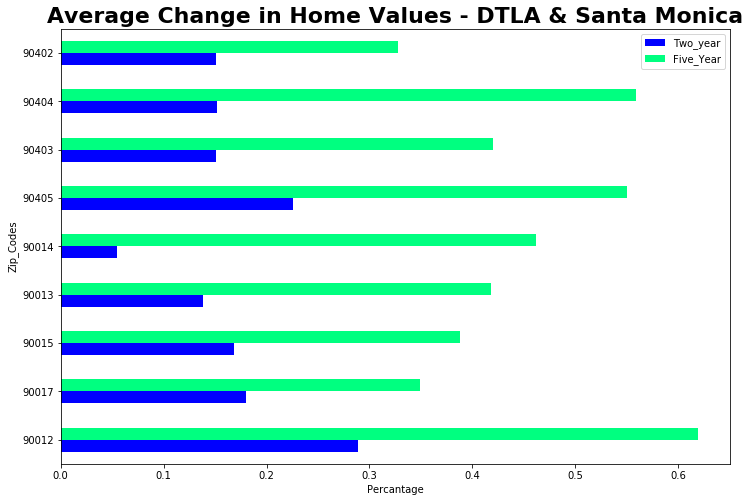

In [31]:
# Closer look at the zip codes and their home values
LA_value.plot(x = "Zip_Codes", y = ["Two_year", "Five_Year"], kind = "barh",
              figsize = (12, 8), colormap = "winter")
plt.xlabel("Percantage")
plt.title("Average Change in Home Values - DTLA & Santa Monica",
          fontdict = font)
plt.show()

According to this data the following 5 zip codes have had the most increase in their average home value:

- 90012(DTLA) ~62%
- 90404(SAMO) ~55%
- 90405(SAMO) ~53%
- 90014(DTLA) ~45%
- 90403(SAMO) ~42%
- 90013(DTLA) ~42%

The 90012 area code is assigned to the Chinatown district of Downtown L.A., which has seen some big changes over the years. Gentrification has reached this part of the city and it shows; new high rise apartments, and the close proximity to freeways, Dodger Stadium, the Financial District, the Echo Park and Silver Lake areas which have now become the "HIP" part of town, have all added to the appeal of this district.

The Santa Monica area codes will always show a large increase, property is very expensive when you are close to the Pacific Ocean, and its L.A. life appeal will always be there, but is it really a place you want to invest in knowing that the initial investment will most likely be very high as compared to other parts of the city. 

In [32]:
# Check for stationarity and trends
def stationarity_check(TS, town = ""):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS["value"])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color="yellow",label="Original")
    plt.plot(roll_mean, color="blue", label="Rolling Mean")
    plt.plot(roll_std, color="red", label = "Rolling Std")
    plt.legend(loc="best")
    plt.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", 
        alpha=0.3)
    plt.title(f"{town} Rolling Mean & Standard Deviation", fontdict = font)
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

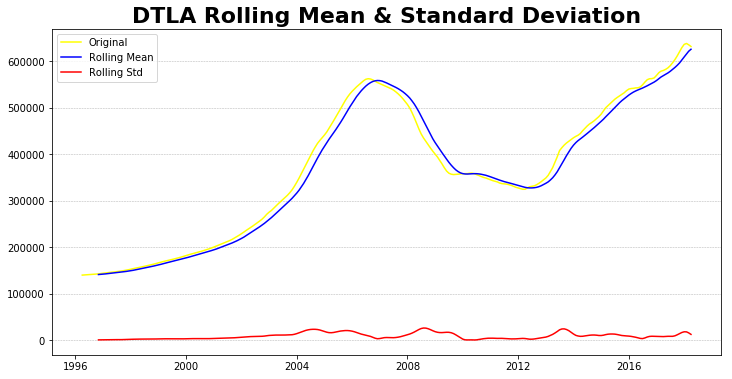

Results of Dickey-Fuller Test: 

Test Statistic                  -1.798553
p-value                          0.381180
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [33]:
stationarity_check(DTLA_melt, town= "DTLA")

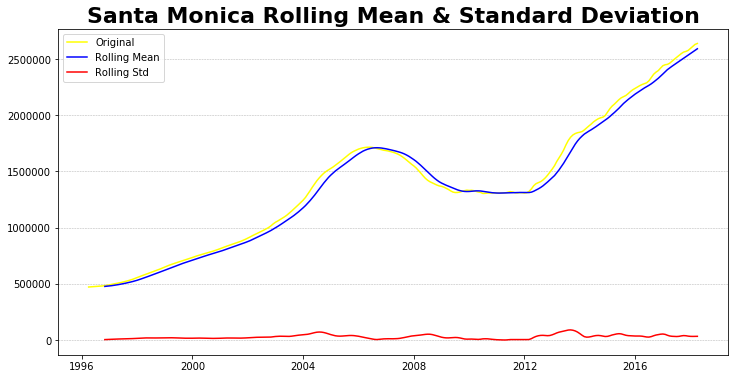

Results of Dickey-Fuller Test: 

Test Statistic                  -0.934609
p-value                          0.776362
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [34]:
stationarity_check(SAMO_melt, town= "Santa Monica")

From the stationarity check we can clearly see that the series are not stationary. I will be running a ARIMA model so this should be accounted for when modeling.

We want to check for seasonality throughout the years, so this function will create a dataframe with the data grouped by year, as well as a boxplot to visualize the data.

In [35]:
def yearly_values(ts, town = ""):
    
    """The function will take a time series and create a new dataframe 
    with the yearly values in the column; this will make plotting easier.
    It will also provide a boxplot of the series."""
    
    year_group = ts.groupby(pd.Grouper(freq ='A'))
    yearly = pd.DataFrame()
    for yr, group in year_group:
        yearly[yr.year] = group.values.ravel()
        
    
    ax = yearly.boxplot(figsize = (18, 6))
    ax.set_ylabel("Home Value (in USD)")
    ax.set_xlabel("Year")
    plt.title(f'{town} Average Home Value by Year', fontdict = font);

The function did not execute at first, I later saw that 1996 and 1998 are not complete years. This is probably because the real estate season usually starts in April around the spring. After filtering out complete years the function worked.

In [36]:
# Filter out for complete years
comp_yr_DTLA_ts = DTLA_melt["1997" : "2017"]
comp_yr_SAMO_ts = SAMO_melt["1997" : "2017"]

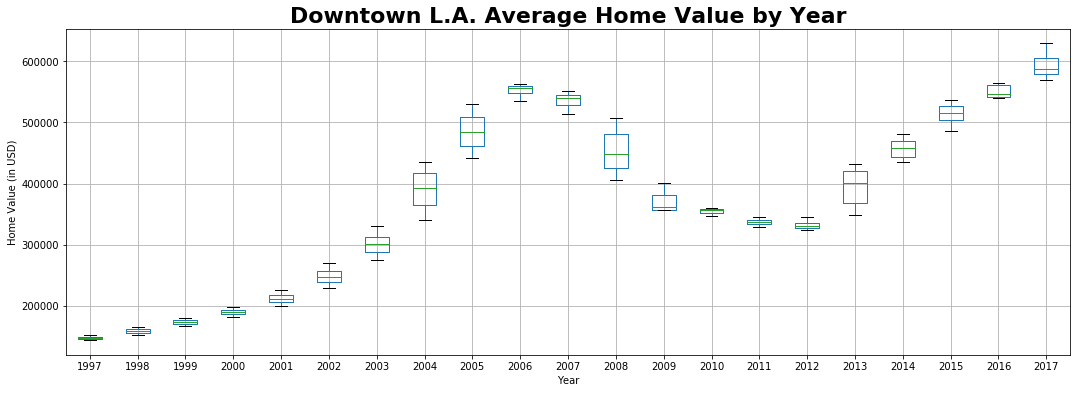

In [37]:
yearly_values(comp_yr_DTLA_ts, "Downtown L.A.")

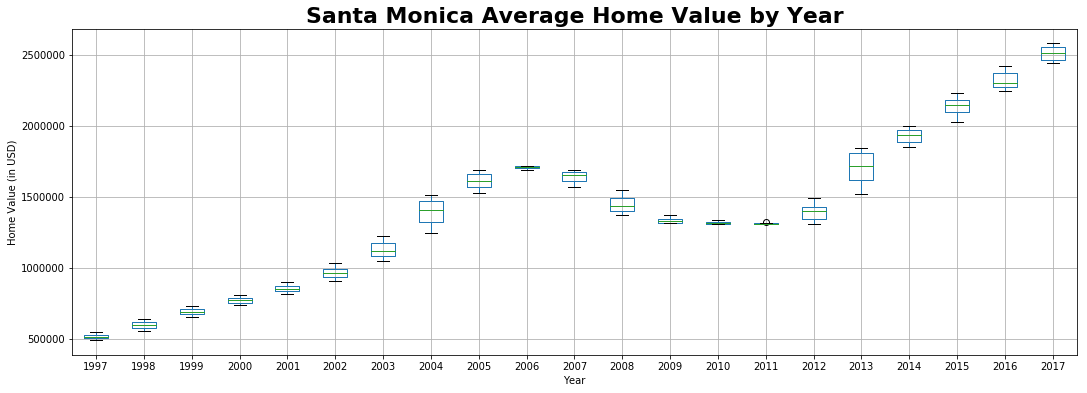

In [38]:
yearly_values(comp_yr_SAMO_ts, "Santa Monica")

This confirms that investing in Santa Monica is pricey! We can also see the drop in value for both areas during the market crash in 2008, with an upward trend starting in 2013. 

Since our stakeholders are interested in where to invest we will use the ROI statistic to further evaluate which area might be suitable for a sound investment.

In [39]:
def ROI_gain(ts, town = "", plot=True):
    
    """The function will take the series and calculate the ROI for the
    specified periods."""
    
    two_yr_roi = (ts - ts.shift(periods=24))/ts.shift(periods=24)*100
    five_yr_roi = (ts - ts.shift(periods=60))/ts.shift(periods=60)*100
    two_yr_roi.dropna(inplace = True)
    five_yr_roi.dropna(inplace = True)
    
    #Plot results
    if plot:        
        plt.figure(figsize=(18, 6))
        ax = plt.subplot(1, 1, 1, facecolor = "Gainsboro")
        ax.plot(two_yr_roi, "bo", label = "Two Year Return", color = "red",
           alpha = 0.5)
        ax.plot(five_yr_roi, "bo", label = "Five Year Return", color = "blue",
           alpha = 0.5)
        ax.set_ylabel("ROI percentage", fontsize = 14)
        ax.set_xlabel("Year", fontsize = 14)
        ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", 
            alpha=0.3)
        plt.yticks([-40, -30, -20, -10, 0, 10, 25, 50, 75, 100, 125, 150, 175, 200, 250])
        plt.title(f'{town} Two and Five Year ROI', fontdict = font)
        plt.legend()
        plt.show()
    
    return two_yr_roi, five_yr_roi    

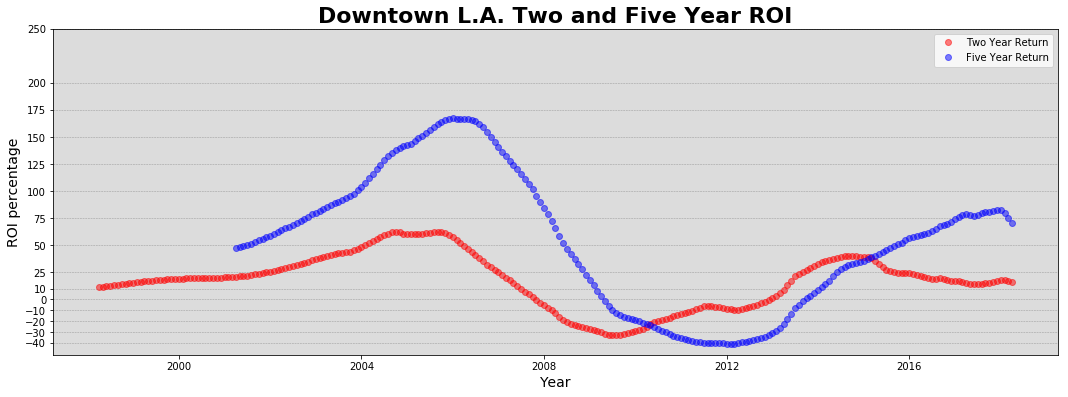

In [40]:
# 2 and 5 year ROI for DTLA
DTLA_2yr_ROI, DTLA_5yr_ROI = ROI_gain(DTLA_melt, town= "Downtown L.A.") 

There were some big losses from 2008 to 2013 for people who invested two and five years prior. For someone that bought a house in 2007, by 2012 they had lost around 40%

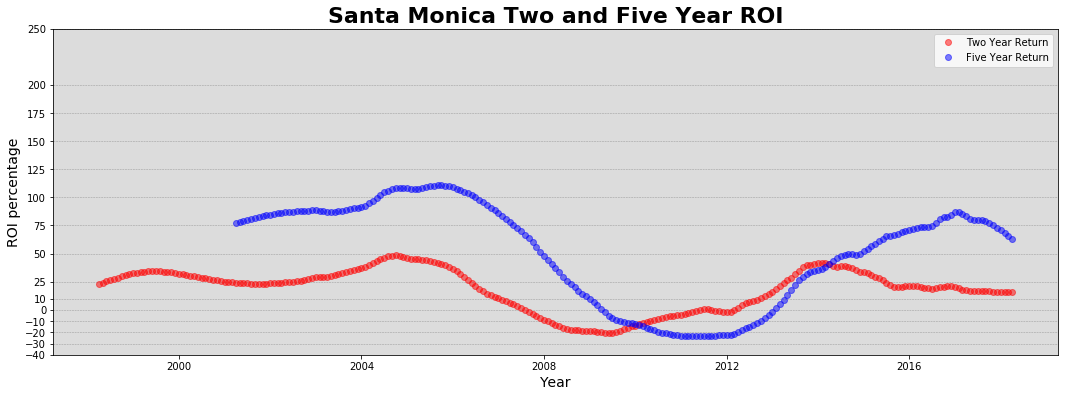

In [41]:
# 2 and 5 year ROI for SAMO
SAMO_2yr_ROI, SAMO_5yr_ROI = ROI_gain(SAMO_melt, "Santa Monica")

According to the data both areas did not fair well during the financial crisis that began around 2008. There also seems to be a downtrend forming going towards 2018. 

Let's compare these two areas side by side.

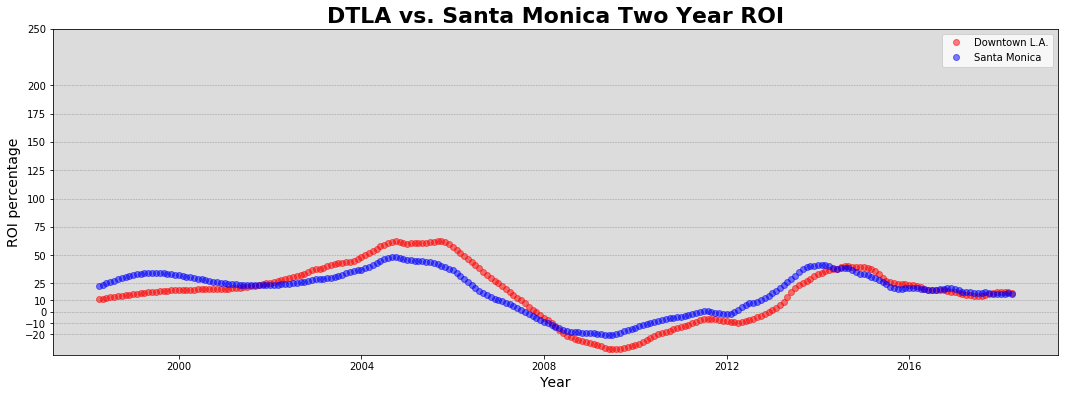

In [42]:
# Comparison of returns
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 1, 1, facecolor = "Gainsboro")
ax.plot(DTLA_2yr_ROI, "bo", label = "Downtown L.A.", color = "red",
        alpha = 0.5)
ax.plot(SAMO_2yr_ROI, "bo", label = "Santa Monica", color = "blue",
        alpha = 0.5)
ax.set_ylabel("ROI percentage", fontsize = 14)
ax.set_xlabel("Year", fontsize = 14)
ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", 
        alpha=0.3)
plt.yticks([-20, -10, 0, 10, 25, 50, 75, 100, 125, 150, 175, 200, 250])
plt.title("DTLA vs. Santa Monica Two Year ROI", fontdict = font)
plt.legend()
plt.show()

From the looks of things L.A. might not be the best place to invest if you are looking for a high short-term return. The maximum reached about 60% in 2006 for someone who invested in 2004 and surprisingly enough it was in Downtown. 

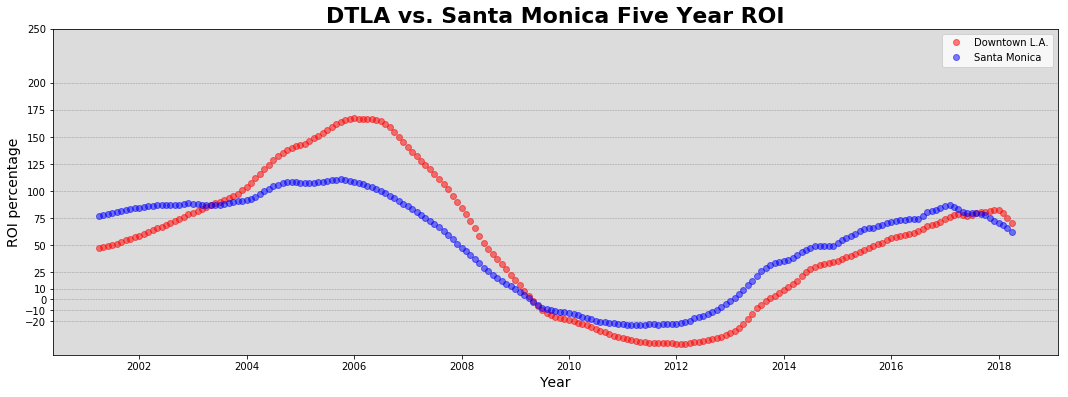

In [43]:
# Returns comparison
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 1, 1, facecolor = "Gainsboro")
ax.plot(DTLA_5yr_ROI, "bo", label = "Downtown L.A.", color = "red",
        alpha = 0.5)
ax.plot(SAMO_5yr_ROI, "bo", label = "Santa Monica", color = "blue",
        alpha = 0.5)
ax.set_ylabel("ROI percentage", fontsize = 14)
ax.set_xlabel("Year", fontsize = 14)
ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", 
        alpha=0.3)
plt.yticks([-20, -10, 0, 10, 25, 50, 75, 100, 125, 150, 175, 200, 250])
plt.title("DTLA vs. Santa Monica Five Year ROI", fontdict = font)
plt.legend()
plt.show()

The returns on a 5 year investment look a bit more promising than the two year. The maximum return reached in 2006 was about 165% for someone who invested in 2001, and what do you know, its in Downtown. There was a big loss of 40% in 2012 for persons that invested in DTLA in 2008, the beginning of the financial crisis. There was also loss in Santa Monica but a bit less at ~23% and they seemed to recover better than DTLA up till 2017, where they are comparable. 

In [44]:
# Let's compare the minimum and maximum returns
ROI = {}
ROI["Downtown L.A."] = {}
ROI["Downtown L.A."]['Min Return 02-Year'] = round(DTLA_2yr_ROI.values.min(),2)
ROI["Downtown L.A."]['Min Return 05-Year'] = round(DTLA_5yr_ROI.values.min(),2)
ROI["Downtown L.A."]['Max Return 02-Year'] = round(DTLA_2yr_ROI.values.max(),2)
ROI["Downtown L.A."]['Max Return 05-Year'] = round(DTLA_5yr_ROI.values.max(),2)
    
ROI["Santa Monica"] = {}
ROI["Santa Monica"]['Min Return 02-Year'] = round(SAMO_2yr_ROI.values.min(),2)
ROI["Santa Monica"]['Min Return 05-Year'] = round(SAMO_5yr_ROI.values.min(),2)
ROI["Santa Monica"]['Max Return 02-Year'] = round(SAMO_2yr_ROI.values.max(),2)
ROI["Santa Monica"]['Max Return 05-Year'] = round(SAMO_5yr_ROI.values.max(),2)

ROI_data = pd.DataFrame.from_dict(ROI)

ROI_data

,Downtown L.A.,Santa Monica
Max Return 02-Year,62.49,48.42
Max Return 05-Year,167.10,110.81
Min Return 02-Year,-33.21,-20.47
Min Return 05-Year,-40.67,-23.62


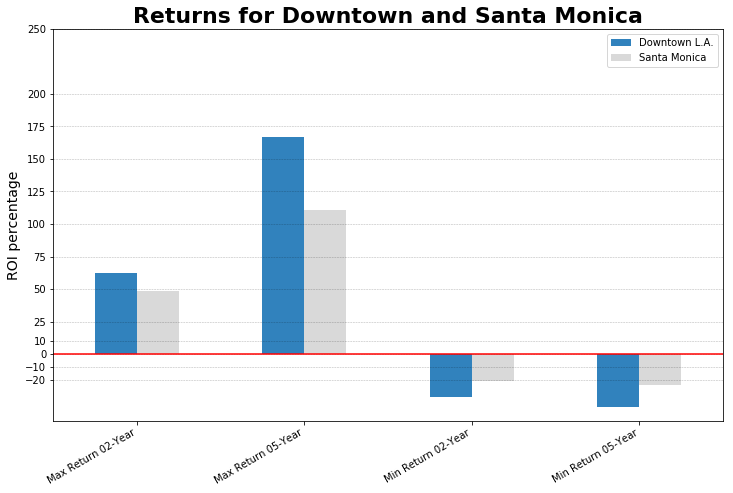

In [45]:
# Return data
ROI_data.plot(kind='bar', colormap='tab20c', figsize=(12,8))
plt.gcf().autofmt_xdate()
plt.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", 
        alpha=0.3)
plt.axhline(y = 0, color = "red")
plt.ylabel("ROI percentage", fontsize = 14)
plt.yticks([-20, -10, 0, 10, 25, 50, 75, 100, 125, 150, 175, 200, 250])
plt.title("Returns for Downtown and Santa Monica", fontdict = font)
plt.legend()
plt.show();

This plot further confirms that historically, Downtown L.A. and Santa Monica are not the place to invest if you are looking for short-term returns, long-term is the way to go in L.A. but another financial crisis or catastrophic event would most definitely bring some very large losses. Downtown has shown that it produces a higher return than Santa Monica, but the losses were a lot less by the beach.

# Step 4: ARIMA Modeling

Now we will take the ROI data and build an ARIMA model so that we can try to predict the return on investment for the next five years and advise our stakeholders on whether or not Los Angeles is a place for a sound investment. 

I will start with the Autocorrelation plots of the data to gain insight on the parameters needed to optimize the model. 

In [46]:
def corr_plots(ts, lags_a = 48, lags_p = 48):
    fig, (ax_a, ax_p) = plt.subplots(2, 1, figsize = (16, 8))
    plot_acf(ts, lags = lags_a, ax = ax_a)
    plot_pacf(ts, lags = lags_p, ax = ax_p)
    plt.show()

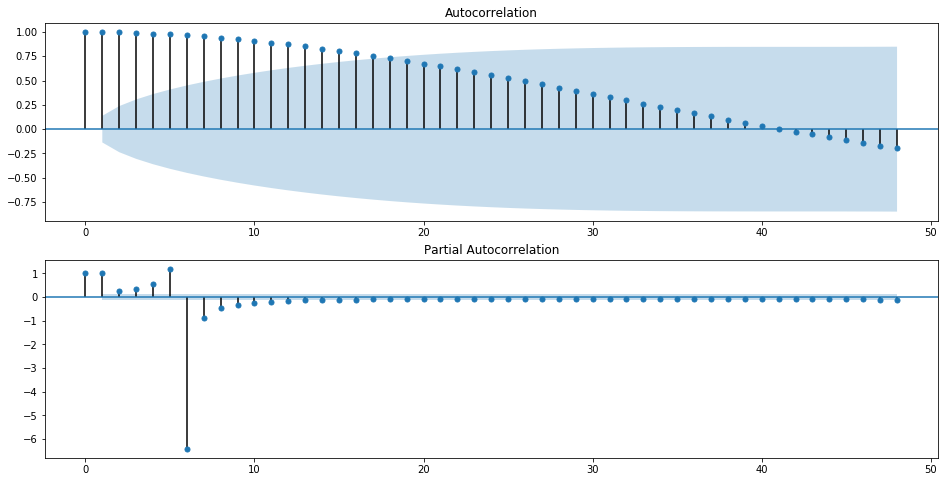

In [47]:
corr_plots(DTLA_5yr_ROI)

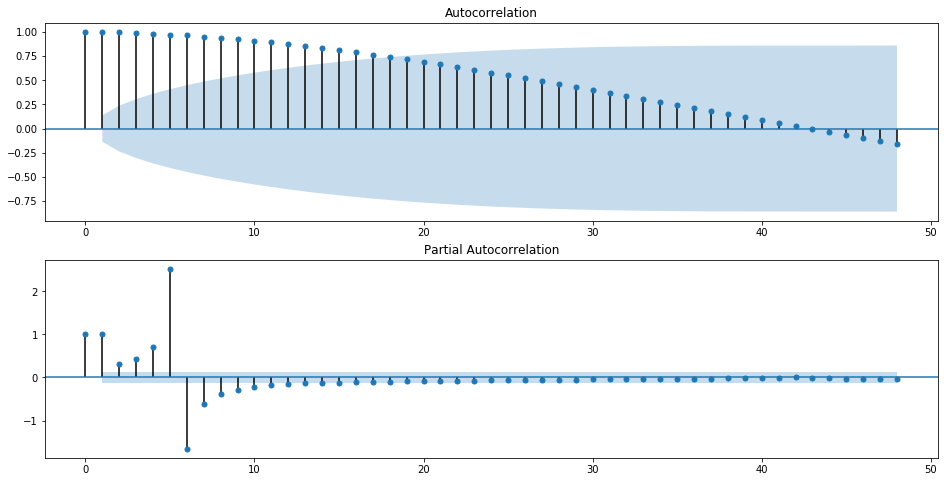

In [48]:
corr_plots(SAMO_5yr_ROI)

The ACF plot for both areas show that there is positive autocorrelation all the way up to 20 lags, this will be kept in mind for our MA terms. 

The PACF plot for DTLA and SAMO show that we will probably not need more than 2 or 3 for the AR terms. 

Now I will check the series for stationarity and get an idea of how much differencing is needed to de-trend.

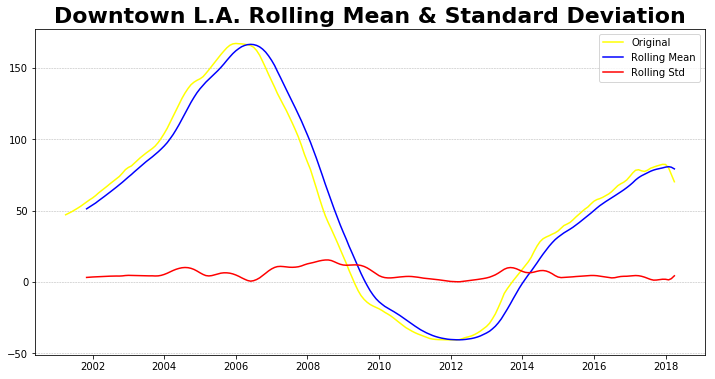

Results of Dickey-Fuller Test: 

Test Statistic                  -2.918575
p-value                          0.043230
#Lags Used                      10.000000
Number of Observations Used    194.000000
Critical Value (1%)             -3.464515
Critical Value (5%)             -2.876556
Critical Value (10%)            -2.574775
dtype: float64


In [49]:
stationarity_check(DTLA_5yr_ROI, "Downtown L.A.")

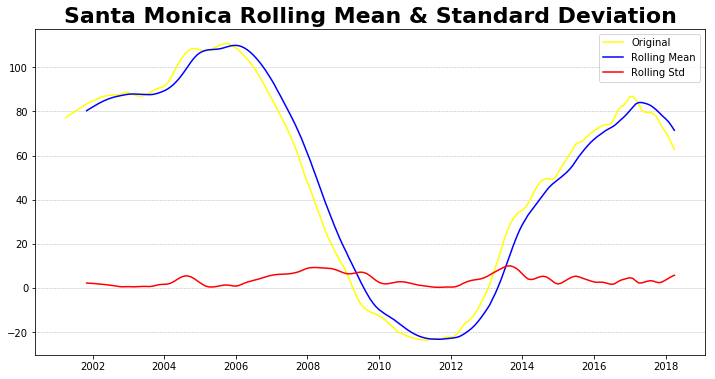

Results of Dickey-Fuller Test: 

Test Statistic                  -2.617069
p-value                          0.089520
#Lags Used                      15.000000
Number of Observations Used    189.000000
Critical Value (1%)             -3.465431
Critical Value (5%)             -2.876957
Critical Value (10%)            -2.574988
dtype: float64


In [50]:
stationarity_check(SAMO_5yr_ROI, "Santa Monica")

From the plots above we will need to difference by at least 1 to improve modeling.

In [51]:
# Importing ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [52]:
# Evaluate an ARIMA model based on different orders
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.90)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
                
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


In [53]:
# Grid for optimal paramters for ARIMA
p_values = [1, 2, 3, 4, 5]
d_values = range(0, 3)
q_values = range(0, 5)

In [54]:
evaluate_models(DTLA_5yr_ROI.values, p_values=p_values, d_values=d_values,
                q_values=q_values)

ARIMA(1, 1, 0) MSE=0.920
ARIMA(1, 1, 1) MSE=0.490
ARIMA(1, 1, 2) MSE=0.405
ARIMA(1, 1, 3) MSE=0.400
ARIMA(1, 1, 4) MSE=0.412
ARIMA(1, 2, 0) MSE=0.595
ARIMA(1, 2, 1) MSE=0.459
ARIMA(1, 2, 2) MSE=0.410
ARIMA(2, 0, 1) MSE=0.481
ARIMA(2, 0, 2) MSE=0.408
ARIMA(2, 0, 3) MSE=0.398
ARIMA(2, 1, 0) MSE=0.580
ARIMA(2, 1, 1) MSE=0.450
ARIMA(2, 1, 2) MSE=0.404
ARIMA(2, 2, 0) MSE=0.421
ARIMA(2, 2, 1) MSE=0.420
ARIMA(2, 2, 2) MSE=0.410
ARIMA(3, 0, 1) MSE=0.450
ARIMA(3, 0, 2) MSE=0.402
ARIMA(3, 1, 1) MSE=0.419
ARIMA(3, 1, 2) MSE=0.406
ARIMA(3, 2, 0) MSE=0.420
ARIMA(3, 2, 1) MSE=0.422
ARIMA(3, 2, 2) MSE=0.447
ARIMA(4, 0, 1) MSE=0.405
ARIMA(4, 1, 1) MSE=0.428
ARIMA(4, 1, 2) MSE=0.444
ARIMA(4, 1, 4) MSE=0.441
ARIMA(4, 2, 0) MSE=0.425
ARIMA(4, 2, 1) MSE=0.421
ARIMA(4, 2, 2) MSE=0.396
ARIMA(4, 2, 3) MSE=0.403
ARIMA(5, 0, 1) MSE=0.409
ARIMA(5, 0, 2) MSE=0.430
ARIMA(5, 1, 1) MSE=0.420
ARIMA(5, 1, 2) MSE=0.397
ARIMA(5, 2, 0) MSE=0.444
ARIMA(5, 2, 1) MSE=0.446
ARIMA(5, 2, 2) MSE=0.405
ARIMA(5, 2, 3) MSE=0.402


In [55]:
evaluate_models(SAMO_5yr_ROI.values, p_values=p_values, d_values=d_values,
                q_values=q_values)

ARIMA(1, 1, 0) MSE=1.044
ARIMA(1, 1, 1) MSE=0.623
ARIMA(1, 1, 2) MSE=0.610
ARIMA(1, 1, 3) MSE=0.392
ARIMA(1, 1, 4) MSE=0.433
ARIMA(1, 2, 0) MSE=0.895
ARIMA(1, 2, 1) MSE=0.650
ARIMA(1, 2, 2) MSE=0.442
ARIMA(1, 2, 3) MSE=0.391
ARIMA(2, 0, 1) MSE=0.615
ARIMA(2, 0, 2) MSE=0.608
ARIMA(2, 1, 0) MSE=0.852
ARIMA(2, 1, 1) MSE=0.623
ARIMA(2, 1, 2) MSE=0.499
ARIMA(2, 1, 3) MSE=0.384
ARIMA(2, 2, 0) MSE=0.603
ARIMA(2, 2, 1) MSE=0.576
ARIMA(2, 2, 2) MSE=0.505
ARIMA(2, 2, 3) MSE=0.419
ARIMA(2, 2, 4) MSE=0.378
ARIMA(3, 0, 1) MSE=0.618
ARIMA(3, 1, 0) MSE=0.601
ARIMA(3, 1, 1) MSE=0.570
ARIMA(3, 1, 2) MSE=0.415
ARIMA(3, 1, 3) MSE=0.418
ARIMA(3, 2, 0) MSE=0.596
ARIMA(3, 2, 1) MSE=0.591
ARIMA(3, 2, 2) MSE=0.441
ARIMA(3, 2, 4) MSE=0.389
ARIMA(4, 0, 1) MSE=0.553
ARIMA(4, 1, 0) MSE=0.587
ARIMA(4, 1, 1) MSE=0.585
ARIMA(4, 1, 4) MSE=0.374
ARIMA(4, 2, 0) MSE=0.607
ARIMA(4, 2, 1) MSE=0.642
ARIMA(5, 0, 1) MSE=0.564
ARIMA(5, 1, 0) MSE=0.602
ARIMA(5, 1, 1) MSE=0.638
ARIMA(5, 1, 2) MSE=0.517
ARIMA(5, 2, 0) MSE=0.635


After performing the grid search for optimal parameters, the best order for the DTLA series is (4, 2, 2), with an MSE of .396 and (4, 1, 4) for the SAMO series, with an MSE of .374.

Next I will run the model with these parameters and evaluate the results.

In [80]:
def fit_ARIMA_model(ts, order=(1,1,1), summary=True, plot=True, plot_pred=True):
    
    '''Takes a time series and runs a ARIMA model with parameter order provided. 
    If no parameter provided default is (1,1,1). Has the default option to
    print model summary and plot diagnostics, which can be turned off.'''
  
    # fit model
    model = ARIMA(ts, order=order)
    
    output = model.fit(disp=0)
    
    if summary==True:
        print(output.summary())

    if plot==True:
        # plot model residuals
        residuals = pd.DataFrame(output.resid)
        fig, ax = plt.subplots(1,2, figsize=(16, 8))
        residuals.plot(title="Residuals", ax=ax[0])
        residuals.plot(kind='kde', title='Density', ax=ax[1])
        plt.show()
        
    if plot_pred==True:
    #plot actual vs. fitted
        output.plot_predict(dynamic=False)
        plt.show()
        
    
    return output

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  203
Model:                 ARIMA(4, 2, 2)   Log Likelihood                 -88.492
Method:                       css-mle   S.D. of innovations              0.369
Date:                Sat, 13 Jun 2020   AIC                            192.984
Time:                        10:21:21   BIC                            219.490
Sample:                    06-01-2001   HQIC                           203.707
                         - 04-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0253      0.046     -0.545      0.586      -0.116       0.066
ar.L1.D2.value    -0.2745      0.070     -3.949      0.000      -0.411      -0.138
ar.L2.D2.value    -0.4913      0.069

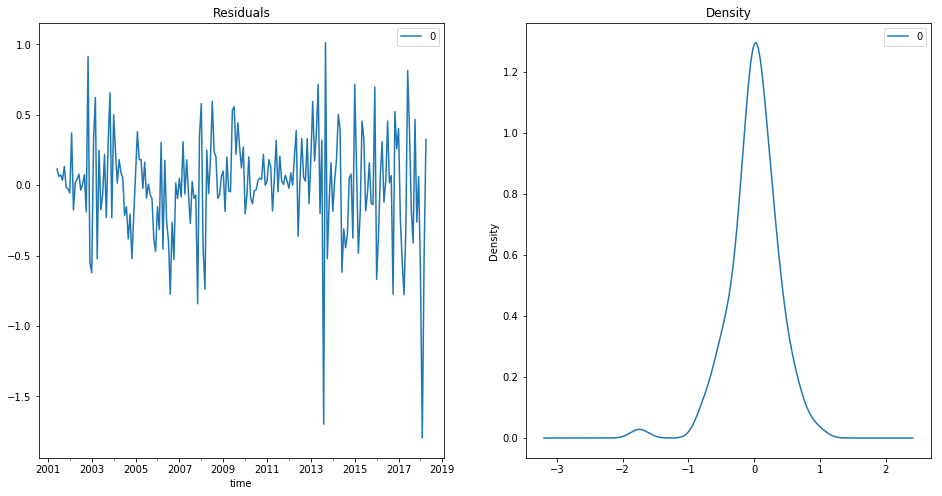

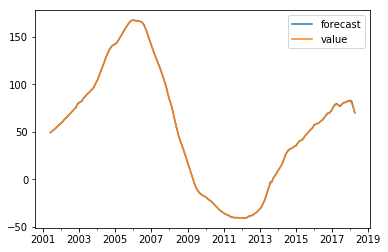

In [81]:
# DTLA ARIMA model
DTLA_5yr_mod = fit_ARIMA_model(DTLA_5yr_ROI, order=(4, 2, 2))

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  204
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 -81.583
Method:                       css-mle   S.D. of innovations              0.347
Date:                Sat, 13 Jun 2020   AIC                            183.167
Time:                        09:56:53   BIC                            216.348
Sample:                    05-01-2001   HQIC                           196.589
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1360      0.647     -0.210      0.834      -1.405       1.133
ar.L1.D.value     2.0975      0.064     32.762      0.000       1.972       2.223
ar.L2.D.value    -0.8129      0.156     

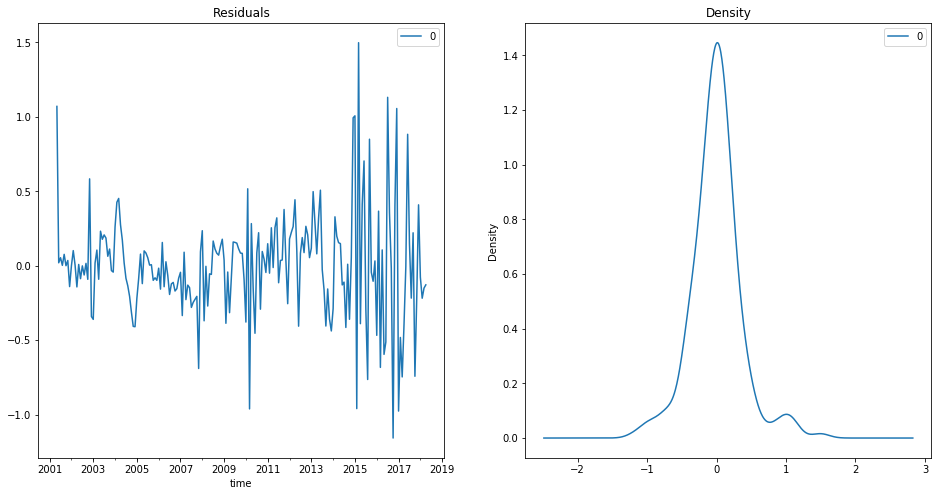

<Figure size 1152x576 with 0 Axes>

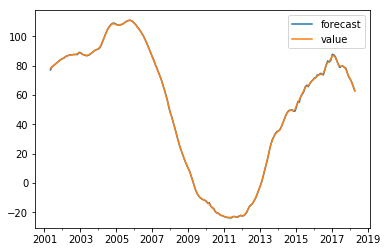

In [68]:
# SAMO ARIMA model
SAMO_5yr_mod = fit_ARIMA_model(SAMO_5yr_ROI, order=(4, 1, 4))

Both models seem to perform pretty well, the residuals do not seem to be correlated and they have a pretty normal distribution with the mean close to 0. The coefficients are all significant with their p-values at 0. 

# Step 5: Model Validation

In [69]:
# forecasting 5 year return
forecast = DTLA_5yr_mod.forecast(60)

real_forecast = forecast[0]
conf_int = forecast[2]

In [70]:
# new dataframe with 5 year period as index, forecasts, min/max returns
df_forecast = pd.DataFrame({'time': pd.date_range(start = '2018-05-01', 
                                                  end = '2023-04-01',
                                                  freq = 'MS')})
df_forecast['forecast'] = real_forecast
df_forecast['minimum_return'] = conf_int[:, 0]
df_forecast['maximum_return'] = conf_int[:, 1]
df_forecast.set_index('time', inplace = True)

In [71]:
# combining model data and forecast data
forecast_df_DTLA = pd.concat([DTLA_5yr_ROI, df_forecast])
forecast_df_DTLA.tail()

,forecast,maximum_return,minimum_return,value
time,,,,
2022-12-01,-201.124426,115.780977,-518.029829,NaN
2023-01-01,-206.685515,118.692898,-532.063929,NaN
2023-02-01,-212.272817,121.652752,-546.198386,NaN
2023-03-01,-217.887158,124.659273,-560.433588,NaN
2023-04-01,-223.524330,127.715762,-574.764423,NaN


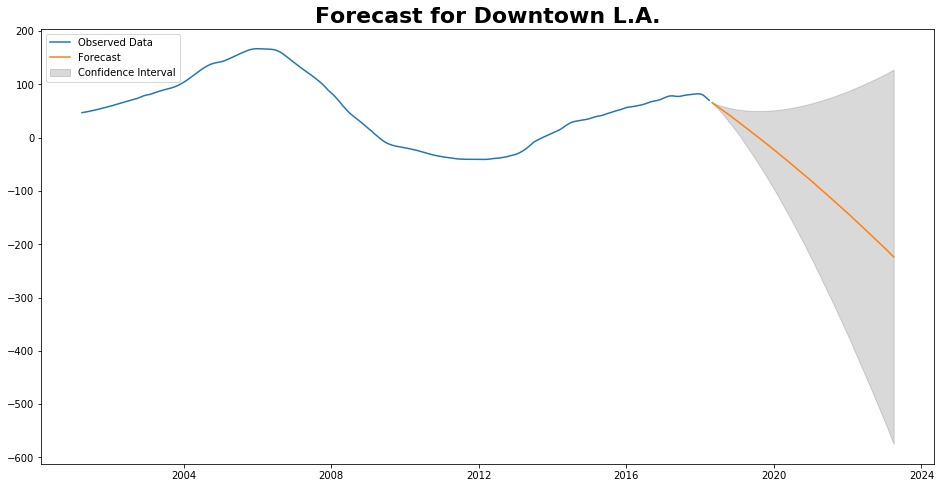

          Forecasted Five Year Return
forecast                  -223.524330
maximum                    127.715762
minimum                   -574.764423


In [72]:
# plotting results
fig = plt.figure(figsize = (16, 8))

plt.plot(forecast_df_DTLA['value'], label = 'Observed Data')
plt.plot(forecast_df_DTLA['forecast'], label = 'Forecast')
plt.fill_between(forecast_df_DTLA.index, forecast_df_DTLA['minimum_return'],
                 forecast_df_DTLA['maximum_return'], color="k", alpha=.15,
                 label = 'Confidence Interval')
plt.legend(loc = 'upper left')
plt.title('Forecast for Downtown L.A.', fontdict=font)
plt.show()

predictions = {}
predictions['forecast'] = forecast_df_DTLA["forecast"][-1]
predictions['maximum'] = forecast_df_DTLA["maximum_return"][-1]
predictions['minimum'] = forecast_df_DTLA["minimum_return"][-1]

DTLA_pred_data = pd.DataFrame.from_dict(predictions, orient='index',
                                        columns=['Forecasted Five Year Return'])

print(DTLA_pred_data)

Ouch! Interesting, DTLA showed better gains in the past, but this model is predicting a substantial loss of around 224% that could go as far as 575% and a best case scenario of around 128%. This is a very wide confidence interval and I believe the risk is not worth the gain you might see. Downtown L.A. does not look like it will be a very wise business choice.

On to Santa Monica, lets see what the beach can offer.

In [82]:
# forecasting 
forecast_2 = SAMO_5yr_mod.forecast(60)

real_forecast_2 = forecast_2[0]
conf_int_2 = forecast_2[2]

df_forecast_2 = pd.DataFrame({'time': pd.date_range(start = '2018-05-01', 
                                                  end = '2023-04-01',
                                                  freq = 'MS')})
df_forecast_2['forecast'] = real_forecast_2
df_forecast_2['minimum_return'] = conf_int_2[:, 0]
df_forecast_2['maximum_return'] = conf_int_2[:, 1]
df_forecast_2.set_index('time', inplace = True)

In [83]:
forecast_df_SAMO = pd.concat([SAMO_5yr_ROI, df_forecast_2])
forecast_df_SAMO.tail()

,forecast,maximum_return,minimum_return,value
time,,,,
2022-12-01,20.714159,140.360086,-98.931769,NaN
2023-01-01,20.554215,141.694504,-100.586073,NaN
2023-02-01,20.397950,143.017928,-102.222028,NaN
2023-03-01,20.245375,144.331114,-103.840365,NaN
2023-04-01,20.096400,145.634551,-105.441751,NaN


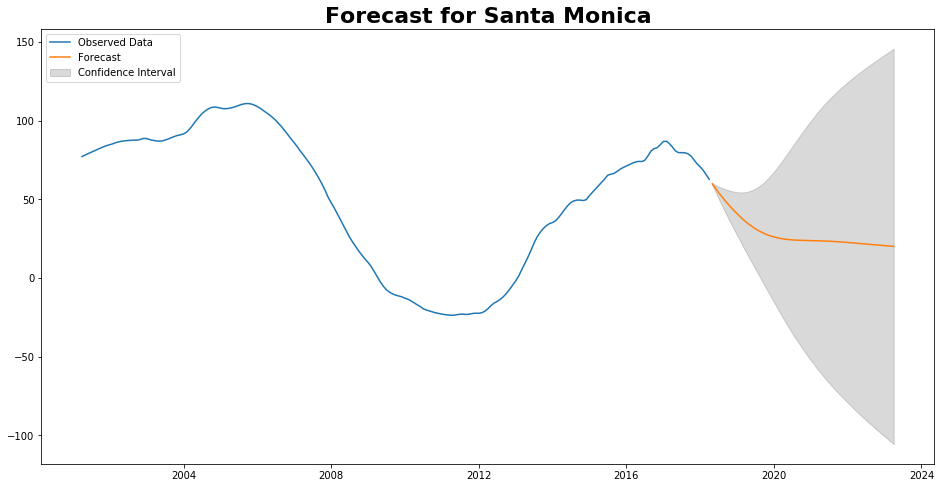

          Forecasted Five Year Return
forecast                    20.096400
maximum                    145.634551
minimum                   -105.441751


In [84]:
fig = plt.figure(figsize = (16, 8))

plt.plot(forecast_df_SAMO['value'], label = 'Observed Data')
plt.plot(forecast_df_SAMO['forecast'], label = 'Forecast')
plt.fill_between(forecast_df_SAMO.index, forecast_df_SAMO['minimum_return'],
                 forecast_df_SAMO['maximum_return'], color="k", alpha=.15,
                 label = 'Confidence Interval')
plt.legend(loc = 'upper left')
plt.title('Forecast for Santa Monica', fontdict=font)
plt.show()

predictions_2 = {}
predictions_2['forecast'] = forecast_df_SAMO["forecast"][-1]
predictions_2['maximum'] = forecast_df_SAMO["maximum_return"][-1]
predictions_2['minimum'] = forecast_df_SAMO["minimum_return"][-1]

SAMO_pred_data = pd.DataFrame.from_dict(predictions_2, orient='index',
                                        columns=['Forecasted Five Year Return'])

print(SAMO_pred_data)

Santa Monica seems to be the better choice according to the model. It has predicted a gain and not a loss, although the gain seems to be very small considering this is after 5 years. The confidence interval for the forecast is very wide as well with a maximum return of around 146% and a minimum gain of -105%.  

### Conclusion

We have seen a very interesting result from our modeling. In the past our data showed that DTLA was a better place for investment than Santa Monica even for a short term return at two years. According to our results Santa Monica would seem like the better option for a 5 year return; predicting a 20% gain with a potential gain of 146%, but a potential loss of 105%. 

Now we will take the zip codes from the two areas and filter out the top 5. 

In [86]:
# Dictionary to include all zip code time series
DT_SM = {}
    
# Iterate over all the zip codes within each city
for z in DT_SM_data.Zip_Codes.unique():
    
    # Choosing that specific zip code
    temp_zip_df = DT_SM_data[DT_SM_data.Zip_Codes == z]

    # Creating a time series (via melting) for that zip code
    temp_zip_ts = melt_data(temp_zip_df)

    # Adding that time series to a dictionary
    DT_SM[z] = temp_zip_ts

In [87]:
# Zip codes are now the keys of the dictionary
DT_SM.keys()

dict_keys([90012, 90017, 90015, 90013, 90014, 90405, 90403, 90404, 90402])

In [108]:
def calculate_returns(dictionary_of_zipcodes, years=0):
    
    '''Takes dictionary of zipcodes and number of years as parameters, calculates two and five year ROI
    and returns dictionary with ROI data instead of house price data.'''
    
    if years==2:
        # calculate 2 year returns
        returns = {}
        for i, key in enumerate(dictionary_of_zipcodes):
            temp_return = (dictionary_of_zipcodes[key] - dictionary_of_zipcodes[key].shift(periods=24))/dictionary_of_zipcodes[key].shift(periods=24)*100
            temp_return.dropna(inplace=True)
            returns[list(dictionary_of_zipcodes.keys())[i-1]] = temp_return
            
        return returns
    
    if years==5:
        # calculate 5 year returns
        returns = {}
        for i, key in enumerate(dictionary_of_zipcodes):
            temp_ts = (dictionary_of_zipcodes[key] - dictionary_of_zipcodes[key].shift(periods=60))/dictionary_of_zipcodes[key].shift(periods=60)*100
            temp_ts.dropna(inplace=True)
            returns[list(dictionary_of_zipcodes.keys())[i-1]] = temp_ts
            
        return returns

In [174]:
def filter_zipcodes(returns_dict, years=0, city=''):
    
    '''Takes dictionary with zipcodes and filters to the 5 ones with highest mean
    ROI for the last 6 months of data.'''
    
    # filter only highest current return zipcodes
    temp_dict = {}
    for i, key in enumerate(returns_dict):
        temp_dict[list(returns_dict.keys())[i-1]] = returns_dict[key].iloc[-7:-1].values.mean()#calculating mean return for last 6 months
           
    return_6months = pd.DataFrame.from_dict(temp_dict, orient='index', columns=['Mean 6M Return'])
    return_6months = return_6months.nlargest(5, ['Mean 6M Return']) #taking the 5 largest returns
    return_6months = pd.DataFrame(return_6months) #from array to dataframe format again
    return_6months = return_6months.transpose()
    
    
    # plot results
    zipcodes = [z for z in return_6months.index]
    y_pos = np.arange(len(zipcodes))
    ax = return_6months.plot.bar(align='center', colormap='coolwarm', 
                                 figsize = (16, 8))
    plt.axhline(y=0, color='red', alpha=.5)
    plt.title(f'Best {city} Zipcodes to Invest for {years}-Year Period', 
              fontdict=font)
    ax.set_ylabel('Average Six Month Gain Percentage', fontsize=14)
    plt.xticks([])
    plt.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", 
        alpha=0.3)
    plt.gcf().autofmt_xdate()
    plt.legend(loc='best')
    
    # print returns for each zipcode
    #print(return_6months)
    
    return return_6months

In [109]:
LA_returns = calculate_returns(DT_SM, years=5)

In [116]:
# using the zips as keys we can now check the returns for each one
LA_returns[90012].head()

,value
time,
2001-04-01,53.923415
2001-05-01,54.681648
2001-06-01,55.555556
2001-07-01,56.481481
2001-08-01,57.458564


,90404,90405,90013,90012,90014
Mean 6M Return,97.82017,97.152922,94.655428,73.238773,66.977162


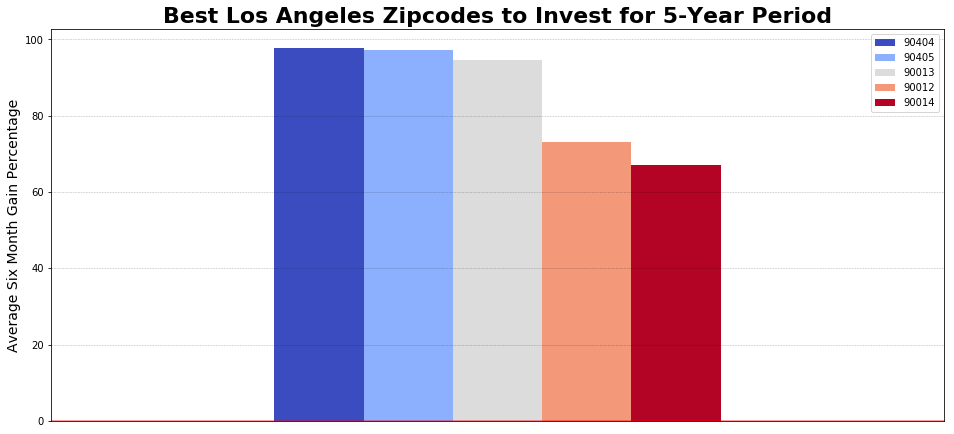

In [175]:
filter_zipcodes(LA_returns, years=5, city= "Los Angeles")

## Top Five Zip Codes to Invest (Downtown L.A. & Santa Monica)

- 90404(SAMO): 98% average six month return
- 90405(SAMO): 97% average six month return
- 90013(DTLA): 95% average six month return
- 90012(DTLA): 73% average six month return
- 90014(DTLA): 67% average six month return

Very interesting result considering all the past data pointed at Downtown L.A. as an area for a sound investment, regardless of the losses seen in the economic crisis of 2008. Santa Monica has come out on top of the list with two different zip codes showing the largest increase in relation to our chosen areas of DTLA and Santa Monica. Investing close to the water seems to be a good idea. 

Below we can view a map and see where exactly in the city these zip codes are. 

In [117]:
# importing zip code database
LA_map_zips = pd.read_csv("zip_code_database.csv")
LA_map_zips.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population_2015
0,501,UNIQUE,0,Holtsville,NaN,I R S Service Center,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,562
1,544,UNIQUE,0,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,NaN,US,40.81,-73.04,0
2,601,STANDARD,0,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas Municipio,America/Puerto_Rico,"787,939",NaN,US,18.16,-66.72,0
3,602,STANDARD,0,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,Aguada Municipio,America/Puerto_Rico,"787,939",NaN,US,18.38,-67.18,0
4,603,STANDARD,0,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla Municipio,America/Puerto_Rico,787,NaN,US,18.43,-67.15,0


In [127]:
# filtering out for the chosen zip codes
LA = LA_map_zips.loc[LA_map_zips["county"] == "Los Angeles County"]

In [128]:
LA.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population_2015
38117,90001,STANDARD,0,Los Angeles,"Firestone Park, Firestone Pk",NaN,CA,Los Angeles County,America/Los_Angeles,323,NaN,US,33.97,-118.24,53610
38118,90002,STANDARD,0,Los Angeles,"August F. Haw, Watts",NaN,CA,Los Angeles County,America/Los_Angeles,"323,562",NaN,US,33.94,-118.24,47820
38119,90003,STANDARD,0,Los Angeles,NaN,Broadway Manchester,CA,Los Angeles County,America/Los_Angeles,323,NaN,US,33.96,-118.27,65150
38120,90004,STANDARD,0,Los Angeles,Oakwood,NaN,CA,Los Angeles County,America/Los_Angeles,323,NaN,US,34.07,-118.31,50840
38121,90005,STANDARD,0,Los Angeles,Sanford,NaN,CA,Los Angeles County,America/Los_Angeles,"213,310,323,562,626,818",NaN,US,34.06,-118.31,29510


In [132]:
# filtering out top five zips according to plot above
zp_LA = [90404, 90405, 90013, 90012, 90014]
DTSM_zps = LA.loc[LA['zip'].isin(zp_LA)]

In [133]:
# verifying that the data is correct
DTSM_zps

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population_2015
38128,90012,STANDARD,0,Los Angeles,NaN,Federal,CA,Los Angeles County,America/Los_Angeles,"818,323",NaN,US,34.06,-118.24,17690
38129,90013,STANDARD,0,Los Angeles,NaN,Federal,CA,Los Angeles County,America/Los_Angeles,"213,310,323,424,562,626,747,818",NaN,US,34.05,-118.24,5930
38130,90014,STANDARD,0,Los Angeles,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,"213,323,562,626,818,310,424,747",NaN,US,34.04,-118.25,4530
38284,90404,STANDARD,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,"310,424",NaN,US,34.02,-118.47,18340
38285,90405,STANDARD,0,Santa Monica,NaN,NaN,CA,Los Angeles County,America/Los_Angeles,"310,424",NaN,US,34.01,-118.46,24020


In [134]:
# create a dataframe with our chosen zips and their position
LA_lat_lon = pd.DataFrame(DTSM_zps, columns=["zip", "latitude", "longitude"])
LA_lat_lon

,zip,latitude,longitude
38128,90012,34.06,-118.24
38129,90013,34.05,-118.24
38130,90014,34.04,-118.25
38284,90404,34.02,-118.47
38285,90405,34.01,-118.46


In [135]:
import folium

In [178]:
# Construct a folium map for L.A.
angels = folium.Map([34.052235,-118.243683], zoom_start=11)
colors = ["blue", "lightblue", "gray", "pink", "darkred"]
# Create a marker for top 5 zip codes
for row in LA_lat_lon.iterrows():
    row_values = row[1]
    location = [row_values['latitude'], row_values['longitude']]
    popup =  row_values['zip']
    marker = folium.Marker(location = location, popup = popup, tooltip="Click Me!")
    marker.add_to(angels)

        
display(angels)

## Recommendations

Stakeholders interested in investing in the L.A. area should start by looking in Santa Monica as it has shown to produce larger gains over a five year period, despite the risk of a potentially large loss if another economic crisis hits like it did in 2008.

Stakeholders that are not interested in buying by the beach can look at the 90013 zip code, which include rapidly growing areas like the Arts District and Little Tokyo. Not only have these areas brought in more tourism but residents as well with the constant construction of luxury apartments and close proximity to public transportation and freeways.

## Future Work

Collect more recent data of home values to help us better understand what is currently going on with the real estate market in Los Angeles. Using this data we can more precisely pin point the correct zip codes to recommend rather than using the historic data we have.

Investigate the data further to better understand the trends and reinforce the predictive capability of the model.

Since we only looked at two areas of the city, further research into the other inland areas and beach areas to see the comparison and find other opportunities that weren't immediately seen. 

Use population, and proximity to freeways and public transportation to see if there is any significant affect on the zip codes average home value. 